In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import tree

In [2]:
df=pd.read_csv(r'Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [5]:
df.duplicated().sum()

0

In [6]:
df['Tax']=np.where(df['Taxable.Income']>30000,'Good','Risky')
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [7]:
label=LabelEncoder()
df['Tax']=label.fit_transform(df['Tax'])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


In [8]:
minmax=MinMaxScaler()
data=minmax.fit_transform(df)

In [9]:
df=pd.DataFrame(data,columns=df.columns)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax
0,0.656468,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.264428,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.300415,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.448436,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.792258,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
596,0.669122,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
597,0.416566,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
598,0.988540,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


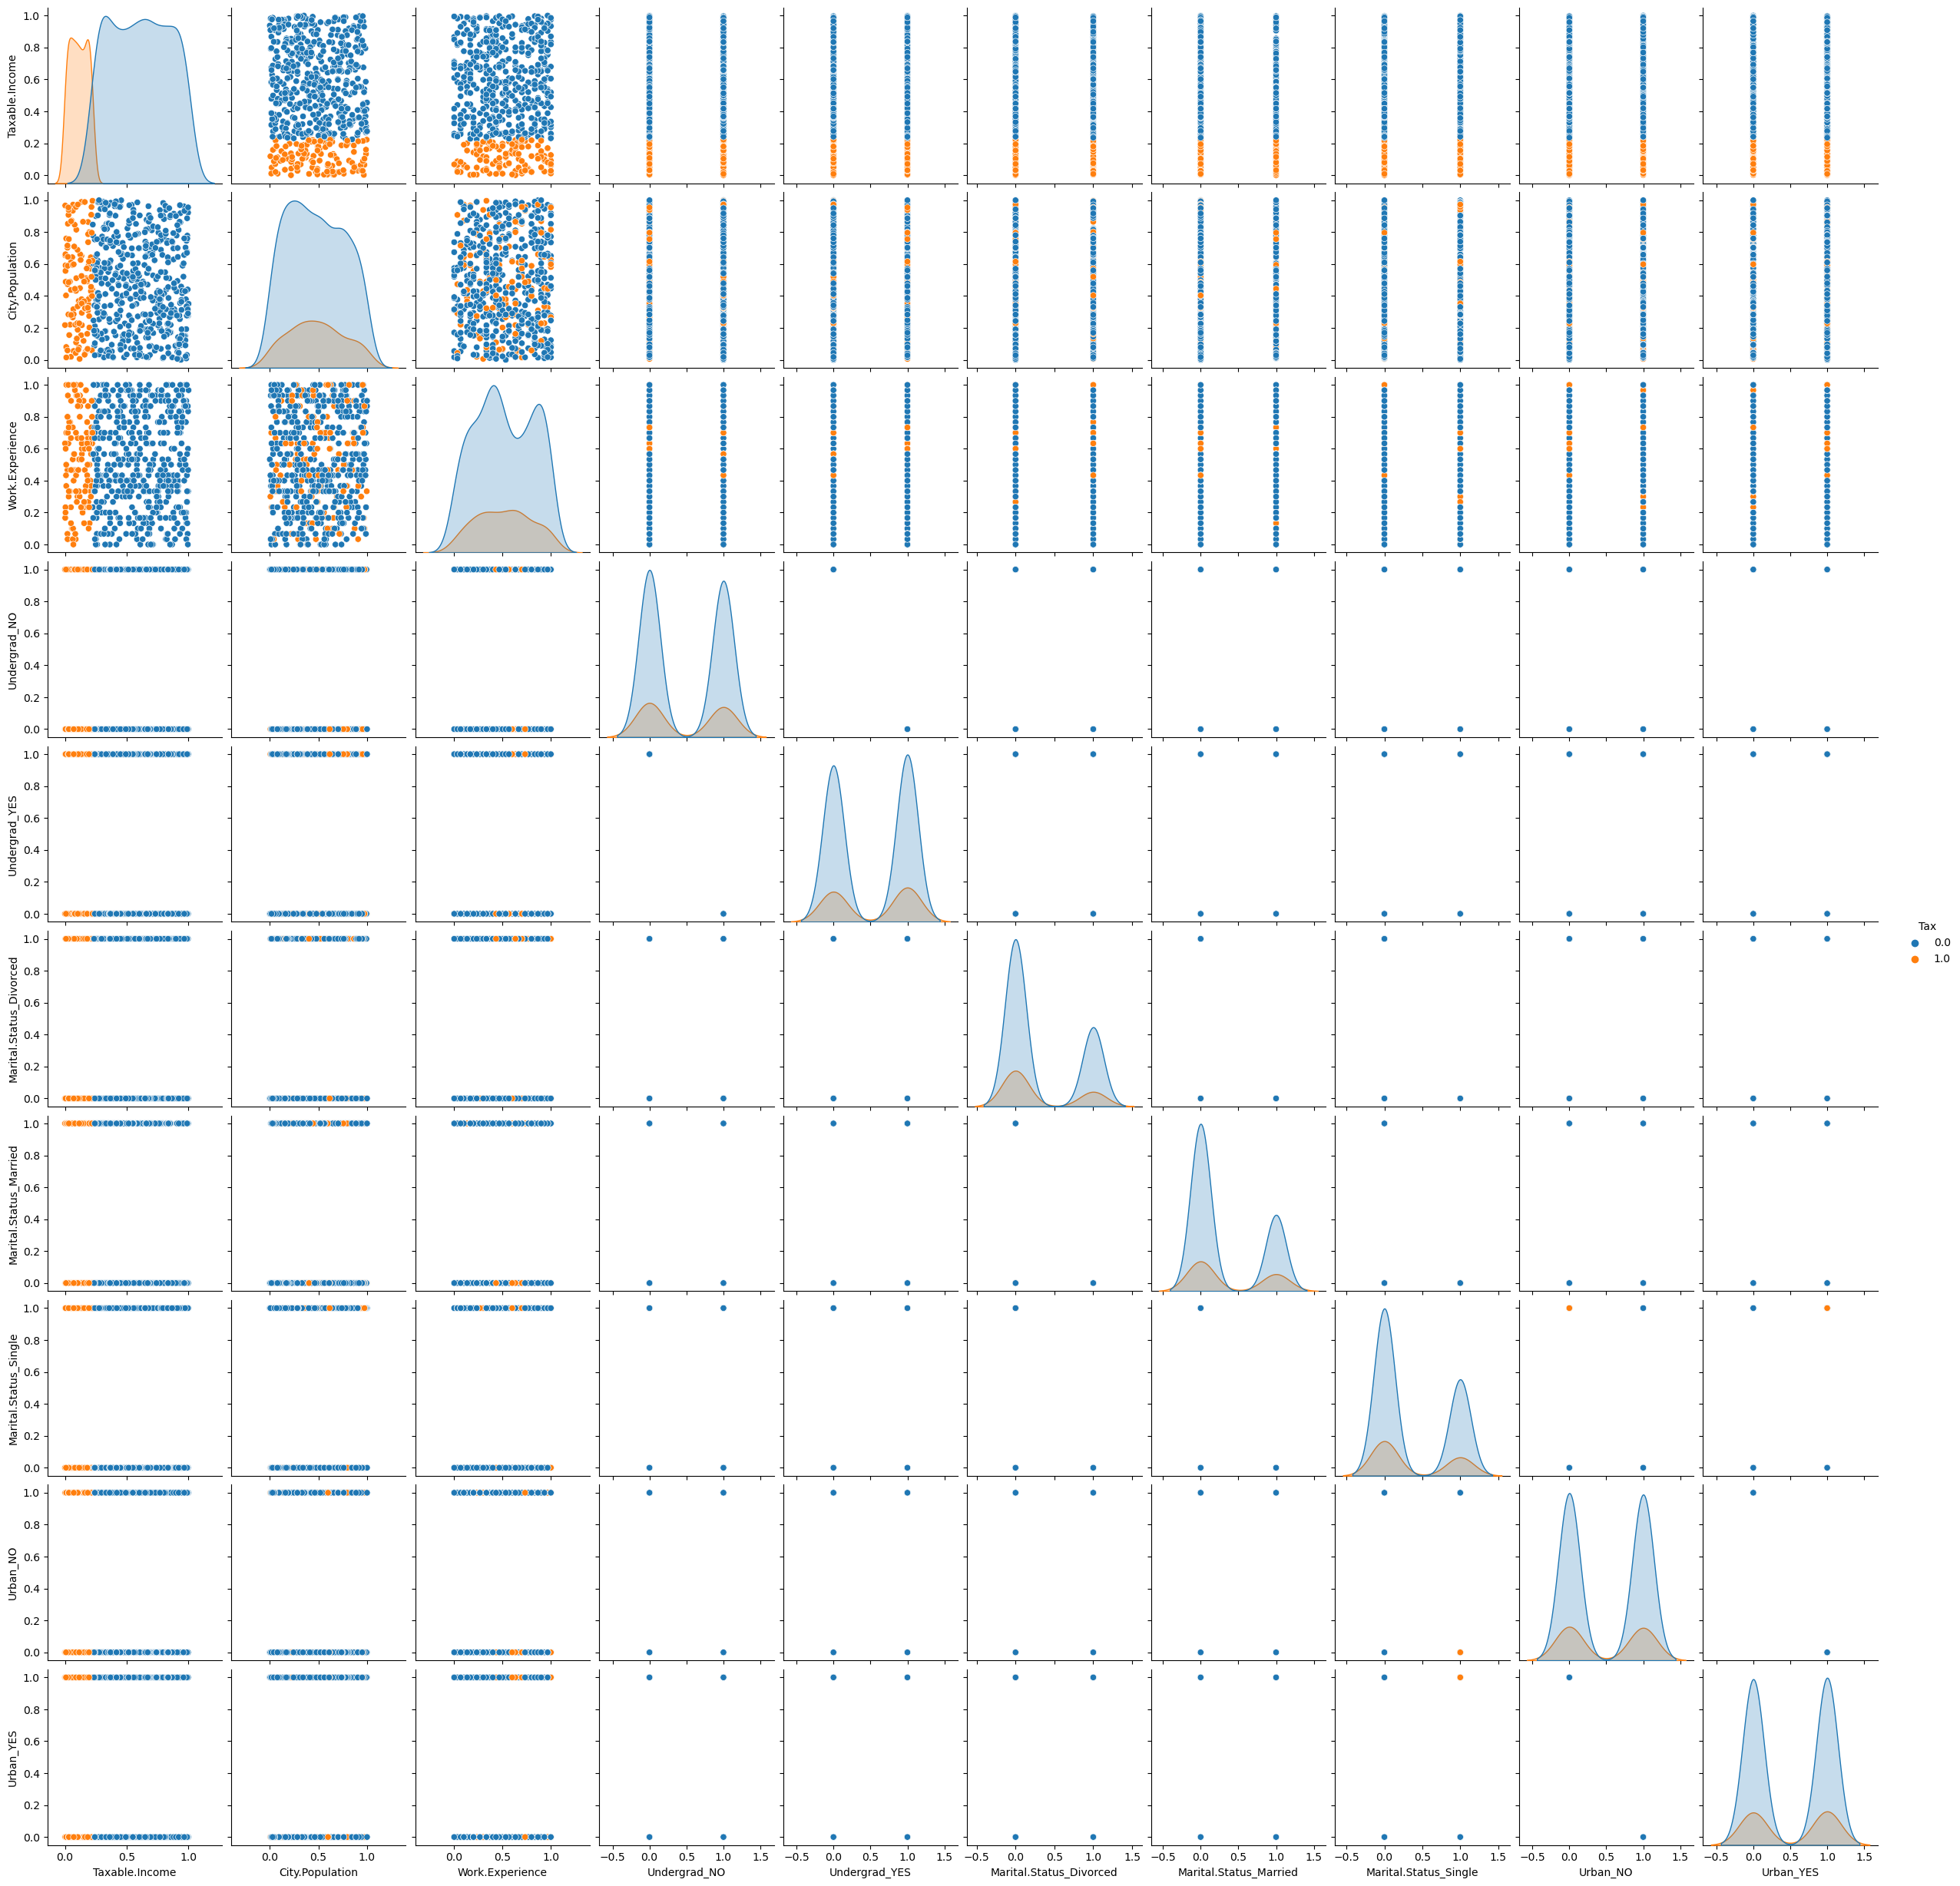

In [10]:
sns.pairplot(df,hue='Tax')

In [11]:
X=df.drop('Tax',axis=1)
X.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0.656468,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.264428,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.300415,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.448436,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.792258,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [12]:
Y=df[['Tax']]
Y.head()

,Tax
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=20)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((450, 10), (150, 10), (450, 1), (150, 1))

In [15]:
random=RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=40,criterion='gini')

In [16]:
random.fit(x_train,y_train)

C:\Users\my computer\AppData\Local\Temp\ipykernel_2128\2148899976.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train,y_train)


RandomForestClassifier(max_depth=20, min_samples_split=40)

In [17]:
y_pred=random.predict(x_test)
y_pred

array([1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

In [18]:
random.score(x_train,y_train)

1.0